# Exam Project | Artificial Neural Networks
By **Pernille Lørup & Stephan Djurhuus**  
Institute **CPHBusiness**  

Education **Software Development**  
Elective **Artificial Intelligence**  

## The Content
## The Theory
## The Source

In [1]:
import cv2
import numpy as np

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.layers import Flatten, Dense

In [2]:
import sys
sys.path.append('../')
from FaceDetector import FaceDetector
from FaceRecognizer import FaceRecognizer
from DataGenerator import DataGenerator
from Utilities import Displayer

In [3]:
classes = ['dad', 'mom']

In [4]:
dad_path = '../data/face-data/PersonGroup/Family3-Man'
mom_path = '../data/face-data/PersonGroup/Family3-Lady'

(train_dad_data, test_dad_data) = DataGenerator.generate(dad_path, 100, label=0, test_size=.2)
(train_mom_data, test_mom_data) = DataGenerator.generate(mom_path, 100, label=1, test_size=.2)

(train_images, train_labels) = DataGenerator.merge_shuffle([train_dad_data, train_mom_data])
(test_images, test_labels) = DataGenerator.merge_shuffle([test_dad_data, test_mom_data])

# greyscalling
train_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in train_images])
test_images = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in test_images])

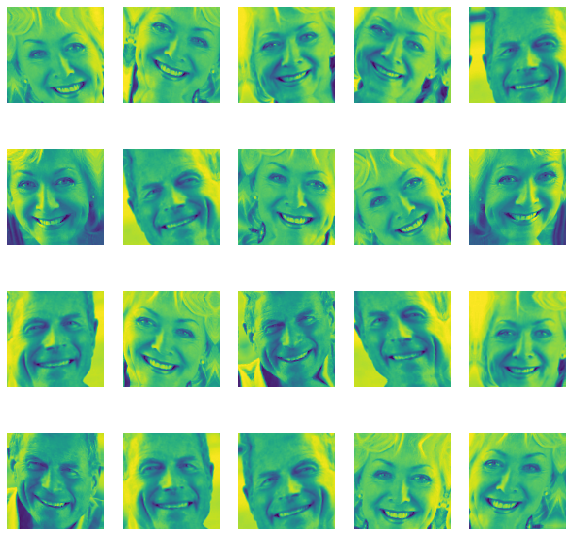

In [5]:
Displayer.images(train_images[200:], 20)

In [6]:
def positive_softmax(input_data):
    relu_data = backend.relu(input_data)        # excluding negative values
    softmax_data = backend.softmax(relu_data)   # 
    return softmax_data

model = models.Sequential([
    Flatten(input_shape=(100, 100)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(2) #positive_softmax)
])

In [7]:
faceRecognizer = FaceRecognizer(classes, model=model)

In [8]:
##faceRecognizer.train_model((train_images, train_labels), (test_images, test_labels), epochs=10)

In [9]:
faceRecognizer.load_model('../models/sequential_model_ann_18-5_fam3_acc100')

In [9]:
faceRecognizer.load_model('../models/sequential_model_ann_18-5_fam3_acc100')

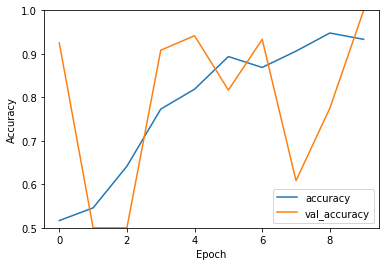

In [10]:
Displayer.acc_history(faceRecognizer.history)

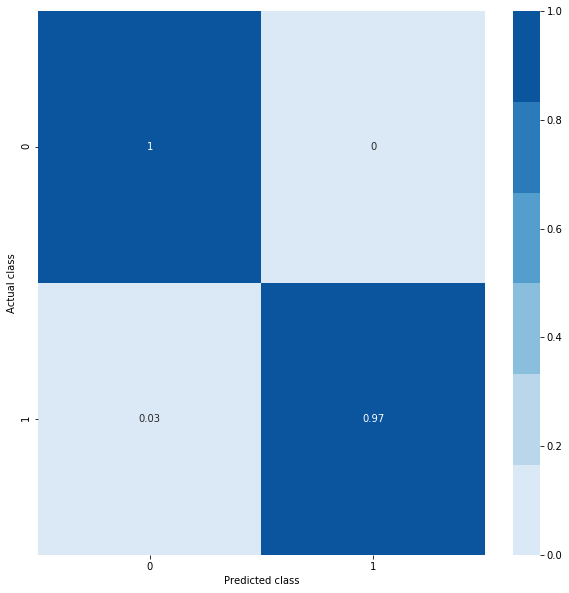

In [11]:
predictions = faceRecognizer.recognize_many(test_images)
Displayer.conf_matrix(predictions, test_labels)

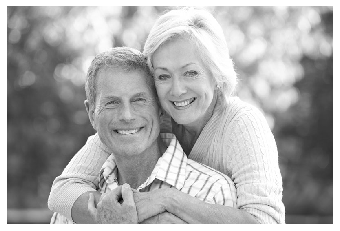

mom


In [25]:
image_path = '../data/face-data/identification3.jpg'
image = cv2.imread(image_path, 0)

prediction = faceRecognizer.recognize(image, gray=True)
Displayer.image(image, bgr=True)
print(prediction)

In [13]:
family_image_path = '../data/face-data/PersonGroup/Family3-Man/Family3-Man1.jpg'
family_image = cv2.imread(family_image_path, gray=True)

faceDetector = FaceDetector('FACE_DEFAULT')
faces_data = faceDetector.face_details(family_image)

prediction_data = faceRecognizer.face_predictions(faces_data)

TypeError: 'gray' is an invalid keyword argument for imread()

In [14]:
Displayer.mark_predictions(family_image, prediction_data, classes)

NameError: name 'family_image' is not defined

In [15]:
#faceRecognizer.save_model('../models/sequential_model_ann_18-5_fam3_acc100')